In [2]:
from scipy import stats
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns
import pandas as pd
from theano import shared
from sklearn import preprocessing
from pymc3 import 

In [31]:
pip install pymc3

     |████████████████████████████████| 869 kB 2.5 MB/s eta 0:00:01
  Using cached dill-0.3.3-py2.py3-none-any.whl (81 kB)
  Using cached cachetools-4.2.2-py3-none-any.whl (11 kB)
  Using cached fastprogress-1.0.0-py3-none-any.whl (12 kB)
     |████████████████████████████████| 1.8 MB 5.6 MB/s eta 0:00:01
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529946 sha256=af8ea4b696e91f39e95b73750baf15e95bed20dfe8cd0afd7ffe03b39bbe6fe9
  Stored in directory: /Users/yiraozhang/Library/Caches/pip/wheels/0e/41/d2/82c7b771236f987def7fe2e51855cce22b270327f3fedec57c
Successfully built theano-pymc
Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_csv("cyano_train.csv")
df.head()

,Unnamed: 0,PRECTOT,ALLSKY_SFC_SW_DWN,DO,TKN,DP,Turb,Temp,Cyano
0,0,0.00,8.75,11.72,0.596,0.061,6.2,1.9,6811
1,1,0.13,26.10,5.84,0.635,0.071,26.7,25.1,914
2,2,0.01,16.76,12.21,0.681,0.015,4.9,5.3,1880
3,3,0.00,25.95,8.87,0.678,0.050,18.1,17.9,2349
4,4,0.00,11.80,8.68,0.553,0.040,13.6,16.8,11406


([<matplotlib.axis.YTick at 0x7fbfc22b27c0>],
 <a list of 1 Text major ticklabel objects>)

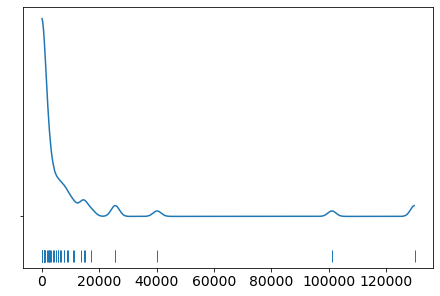

In [19]:
# Histogram distribution of the factors and cyanobacteria
az.plot_kde(df['Cyano'].values, rug=True)
plt.yticks([0], alpha=0)

([<matplotlib.axis.YTick at 0x7fbfc3122400>],
 <a list of 1 Text major ticklabel objects>)

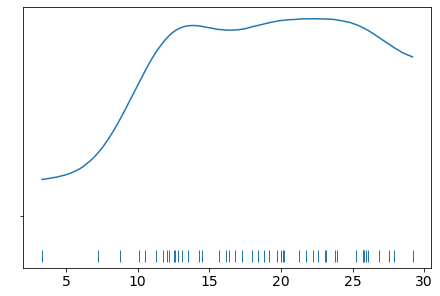

In [20]:
az.plot_kde(df['ALLSKY_SFC_SW_DWN'].values, rug=True)
plt.yticks([0], alpha=0)

([<matplotlib.axis.YTick at 0x7fbfc317a4c0>],
 <a list of 1 Text major ticklabel objects>)

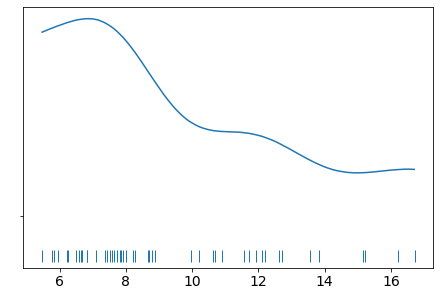

In [21]:
az.plot_kde(df['DO'].values, rug=True)
plt.yticks([0], alpha=0)

([<matplotlib.axis.YTick at 0x7fbfc22b2730>],
 <a list of 1 Text major ticklabel objects>)

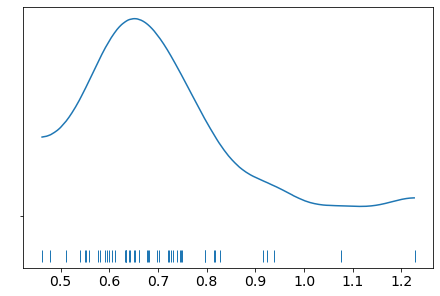

In [22]:
az.plot_kde(df['TKN'].values, rug=True)
plt.yticks([0], alpha=0)

([<matplotlib.axis.YTick at 0x7fbfc3346af0>],
 <a list of 1 Text major ticklabel objects>)

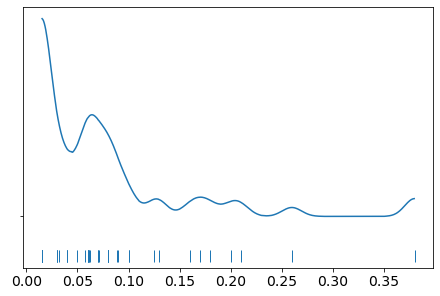

In [23]:
az.plot_kde(df['DP'].values, rug=True)
plt.yticks([0], alpha=0)

([<matplotlib.axis.YTick at 0x7fbfc33a82b0>],
 <a list of 1 Text major ticklabel objects>)

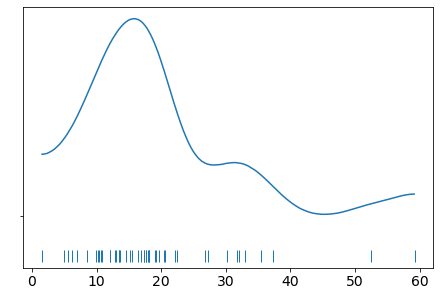

In [24]:
az.plot_kde(df['Turb'].values, rug=True)
plt.yticks([0], alpha=0)

([<matplotlib.axis.YTick at 0x7fbfc3482760>],
 <a list of 1 Text major ticklabel objects>)

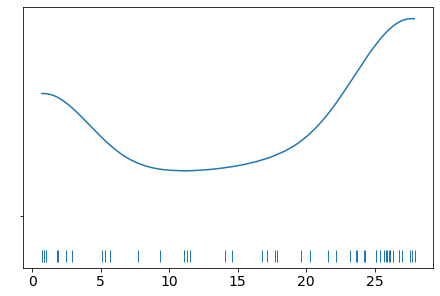

In [26]:
az.plot_kde(df['Temp'].values, rug=True)
plt.yticks([0], alpha=0)

([<matplotlib.axis.YTick at 0x7fbfc354a310>],
 <a list of 1 Text major ticklabel objects>)

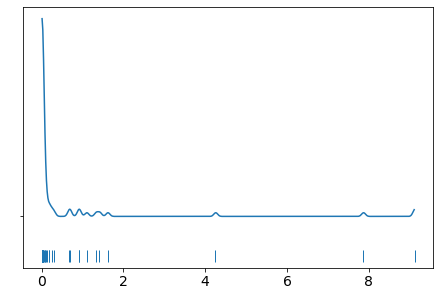

In [27]:
az.plot_kde(df['PRECTOT'].values, rug=True)
plt.yticks([0], alpha=0)

In [7]:
#TKN
with pm.Model() as model:
    mu = pm.Uniform('mu', lower=0.6, upper=0.75)
    sigma = pm.HalfNormal('sigma',sd=10)
    y = pm.Normal('y', mu=mu, sd=sigma, observed=df['TKN'].values)
    trace_g = pm.sample(1000, tune=1000)

<ipython-input-7-fd04c92fe8f2>:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_g = pm.sample(1000, tune=1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 13 seconds.
The acceptance probability does not match the target. It is 0.7183343288016558, but should be close to 0.8. Try to increase the number of tuning steps.


/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feaf666c520>,
      dtype=object)

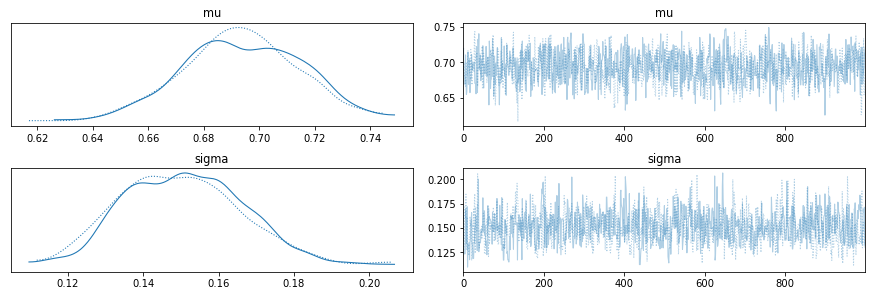

In [8]:
az.plot_trace(trace_g)

In [9]:
az.summary(trace_g)

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,0.694,0.021,0.654,0.733,0.001,0.0,1311.0,1004.0,1.0
sigma,0.151,0.016,0.122,0.182,0.001,0.0,981.0,901.0,1.0


/opt/anaconda3/lib/python3.8/site-packages/arviz/plots/jointplot.py:144: UserWarning: plot_joint will be deprecated. Please use plot_pair instead.
  warnings.warn("plot_joint will be deprecated. Please use plot_pair instead.")
/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/arviz/utils.py:409: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "_cov" failed type inference due to: Untyped global name '_dot': cannot determine Numba type of <class 'arviz.utils.maybe_numba_fn'>

File "../../../../../opt/anaconda3/lib/python3.8/site-packages/arviz/utils.py", line 421:
def _cov(data):
    <source elided>
        x -= avg[:, 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feaf7cb1f70>,
      dtype=object)

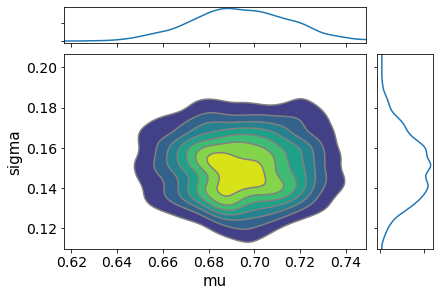

In [10]:
az.plot_joint(trace_g, kind='kde', fill_last=False)

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feaf5cc1e20>,
      dtype=object)

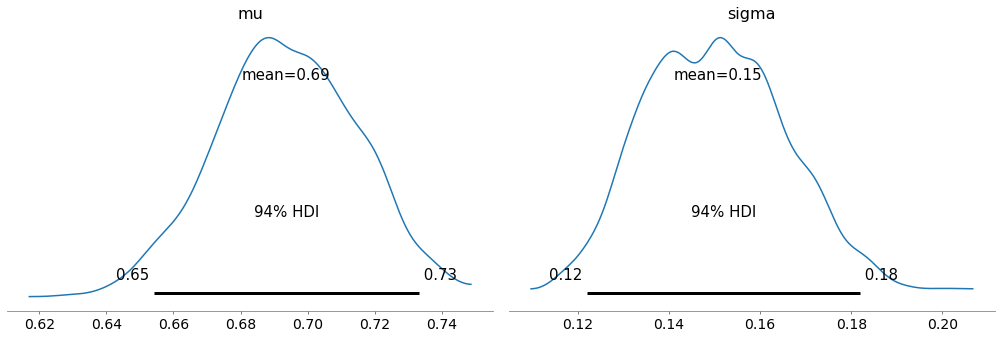

In [11]:
az.plot_posterior(trace_g)

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-19-d3aec848f00c>:2: DeprecationWarning: The function `energyplot` from PyMC3 is just an alias for `plot_energy` from ArviZ. Please switch to `pymc3.plot_energy` or `arviz.plot_energy`.
  (pm.energyplot(trace_g, legend=False, figsize=(6, 4)).set_title("BFMI = {}".format(bfmi)))


Text(0.5, 1.0, 'BFMI = [1.31974026 1.25923063]')

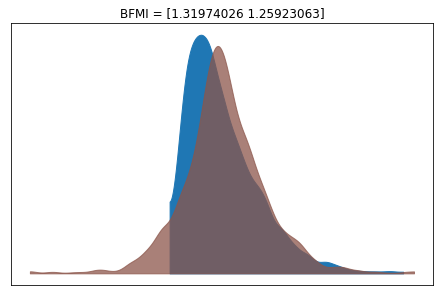

In [19]:
bfmi = pm.bfmi(trace_g)
(pm.energyplot(trace_g, legend=False, figsize=(6, 4)).set_title("BFMI = {}".format(bfmi)))

In [23]:
az.rhat(trace_g)

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<xarray.Dataset>
Dimensions:  ()
Data variables:
    mu       float64 1.003
    sigma    float64 1.001